# Modelling the OLG Model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [16]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from OLGmodel import OLGModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population is constant. A life consists of
two periods, *young* and *old*.

**Households:** As young a household supplies labor exogenously, $L_{t}=1$, and earns a after tax wage $(1-\tau_w)w_{t}$. Consumption as young and old
are denoted by $C_{1t}$ and $C_{2t+1}$. The after-tax return on saving is $(1-\tau_{r})r_{t+1}$. Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}\\
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $L_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=(\alpha K_{t-1}^{-\theta}+(1-\alpha)L_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. Labor market clears: $L_{t}=N_{t}=1$
4. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
5. Asset market clears: $S_{t}=K_{t}+B_{t}$
6. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

Pay As You Go (PAYG): A system in which state retirement benefits are financed by contributions levied from current young, giving the following budget constraints: 
$$C_{1t}+s_t=w_t(1-\tau)$$
$$C_{2t+1}=(1+r_{t+1})s_t+L_{t+1}\tau w_{t+1}$$

Fully Funded (FF): A system in which state retirement benefits are financed by contributions from current young, where these contributions are paid out with interests in the next period. The budget constraints look as the following: 
$$C_{1t}+s_t = w_t(1-\tau)$$
$$C_{2t+1} = (1+r_{t+1})(s_t+\tau w_t)$$

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t} & =F_{K}(K_{t-1},L_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{E}(K_{t-1},L_{t})=(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$


**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$.  *Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1) \\
r_{t} & =F_{K}(K_{t-1},1) \\
w_{t} & =F_{L}(K_{t-1},1) \\
PAYG: C_{2t+1} & =(1+r_{t+1})s_t+L_{t+1}\tau w_{t+1} \\
FF: C_{2t} & =(1+r_{t})(K_{t-1}+\tau w_{t-1}) \\

\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

## Numerical solution

In [17]:
model = OLGModelClass()
par = model.par # SimpleNamespace
sim = model.sim # SimpleNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0

# d. initial values
K_ss = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))
par.K_lag_ini = K_ss

initializing the model:
calling .setup()
calling .allocate()


AttributeError: 'types.SimpleNamespace' object has no attribute 'K_lag'

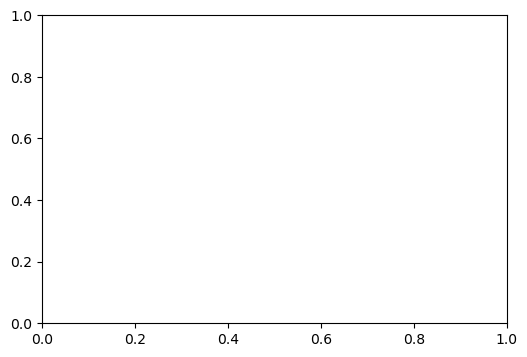

In [18]:
# a. plotting figure
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)

# b. model without tax
par.tau_w=0.0
par.K_lag_ini = 0.172
model.simulate(shock=True)
baseline = model.sim
ax.plot(baseline.K,label='No tax K')

# c. specification of figure
ax.legend(frameon=True)
plt.ylim([0.05, 0.3])
plt.xlim([0,10])
fig.tight_layout()

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 